### Проектная работа по модулю “Препроцессинг данных”


1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).
3. Выбрать стратегию для работы с пропущенными значениями.
4. Рассчитать и визуализировать корреляционную матрицу для переменных.
5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).
6. С помощью статистических методов проверить взаимосвязи между переменными.
7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?
8. Рассчитать Feature Selection для выбранных переменных.
9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

In [608]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import xgboost
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


#### 1. Загрузка данных

In [609]:
df = pd.read_csv('data_breast.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [610]:
df.columns = [
    'id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
    'compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
    'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
    'concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
    'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst',
    'concave_points_worst','symmetry_worst','fractal_dimension_worst','unnamed_col'
]

In [611]:
df.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,unnamed_col
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D4D539E10>,
      dtype=object)

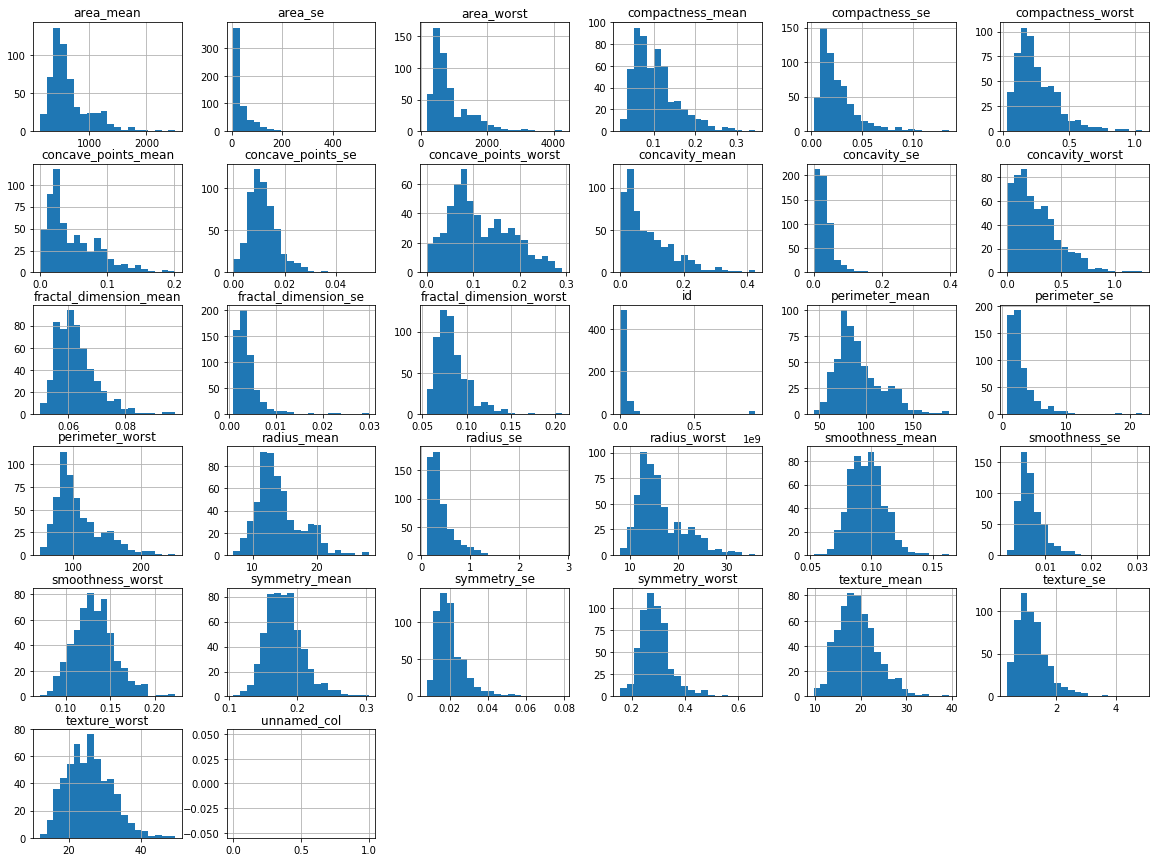

In [612]:
df.hist(bins=20, figsize=(20, 15))

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

#### 2. Основные статистики

In [614]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,unnamed_col
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### 3. Пропущенные значения

In [615]:
#Есть пустаня колонка с индексом 32. Удаляем ее
df = df.drop(df.columns[[32]], axis=1)

#### 4. Корреляционная матрица

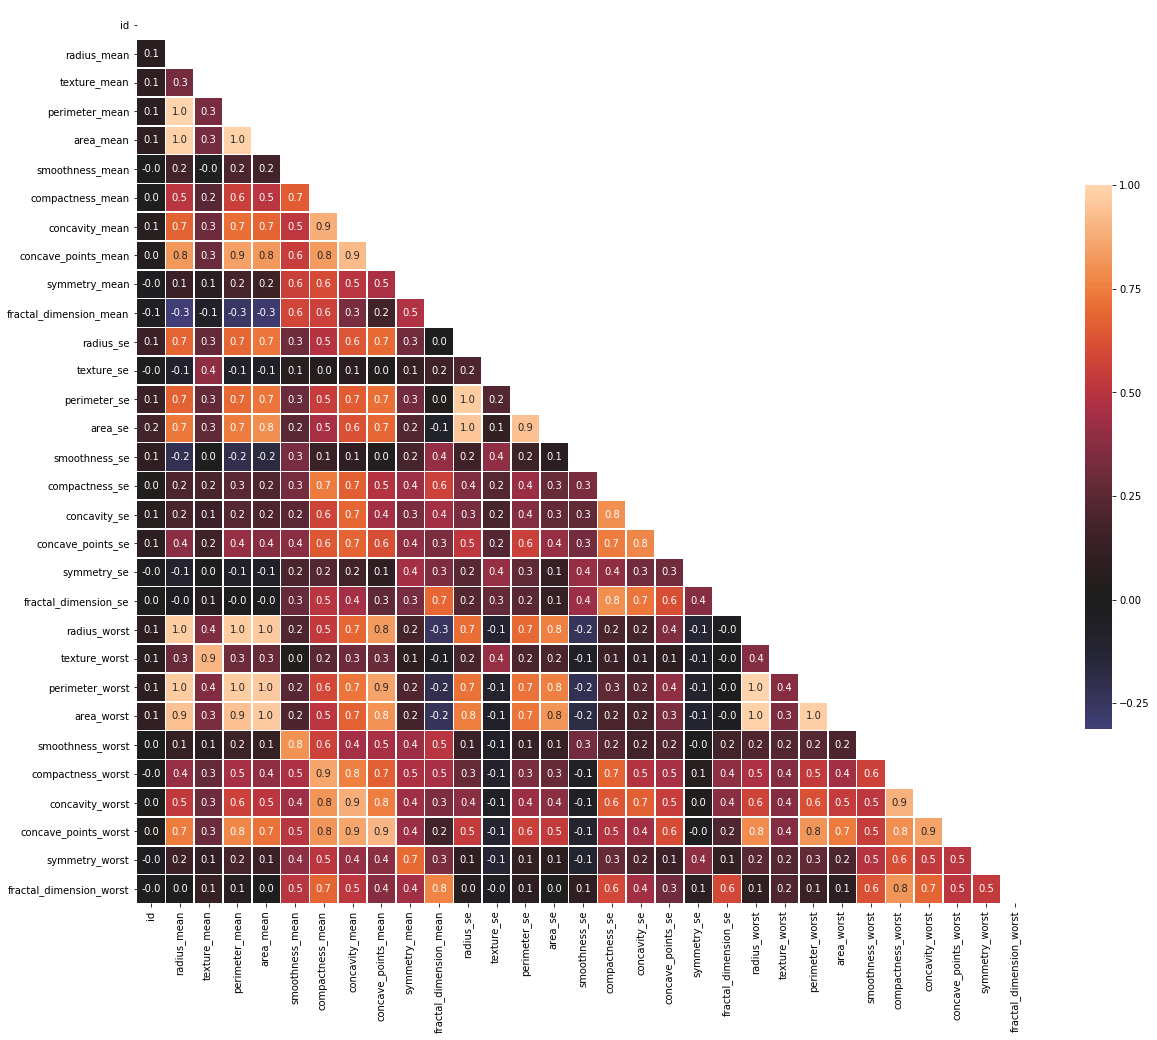

In [616]:
%config InlineBackend.figure_format = 'png' 
corr = df.corr()
plt.figure(figsize=(20,20))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

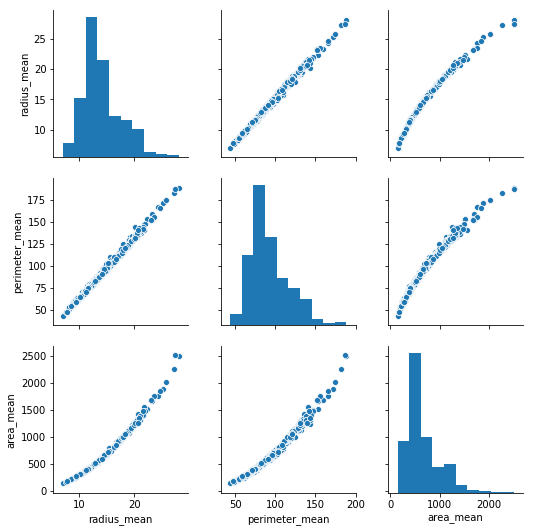

In [617]:
sns.pairplot(df, vars=['radius_mean','perimeter_mean','area_mean'])

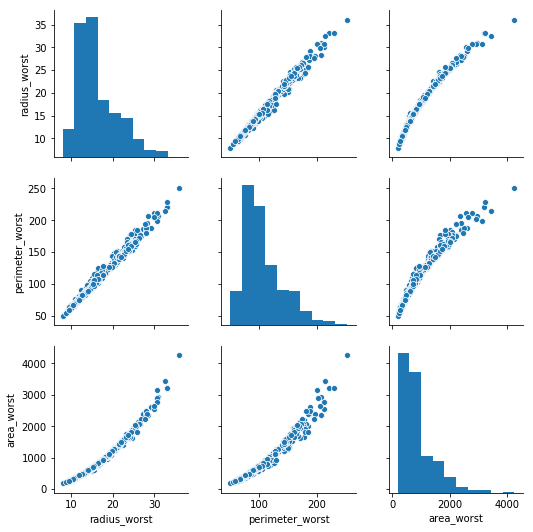

In [618]:
sns.pairplot(df, vars=['radius_worst','perimeter_worst','area_worst'])

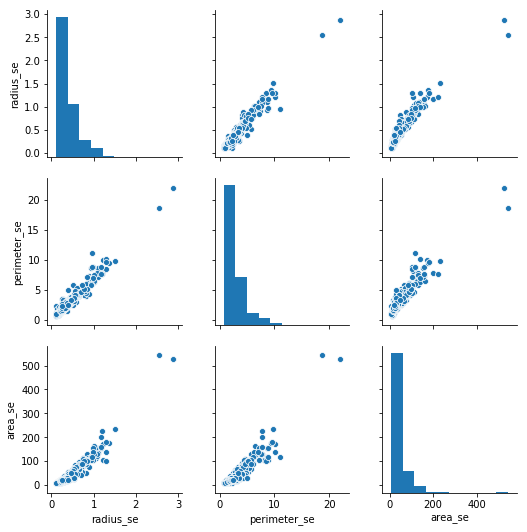

In [619]:
sns.pairplot(df, vars=['radius_se','perimeter_se','area_se'])

In [620]:
#Существует сильная зависимость между атрибутами:
#radius_mean,perimeter_mean,area_mean
#radius_worst,perimeter_worst,area_worst
#radius_se,perimeter_se,area_se
#radius_worst,radius_mean

In [621]:
# Можно удалить атрибуты, которые имеют сильную зависимость от radius_mean,radius_worst,radius_se
df = df.drop(columns=['id'], axis=1)
df = df.drop(columns=['perimeter_mean','area_mean'], axis=1)
df = df.drop(columns=['perimeter_worst','area_worst'], axis=1)
df = df.drop(columns=['perimeter_se','area_se'], axis=1)
df = df.drop(columns=['radius_worst'], axis=1)

In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
texture_worst              569 non-null float64
smoothness_worst           569 n

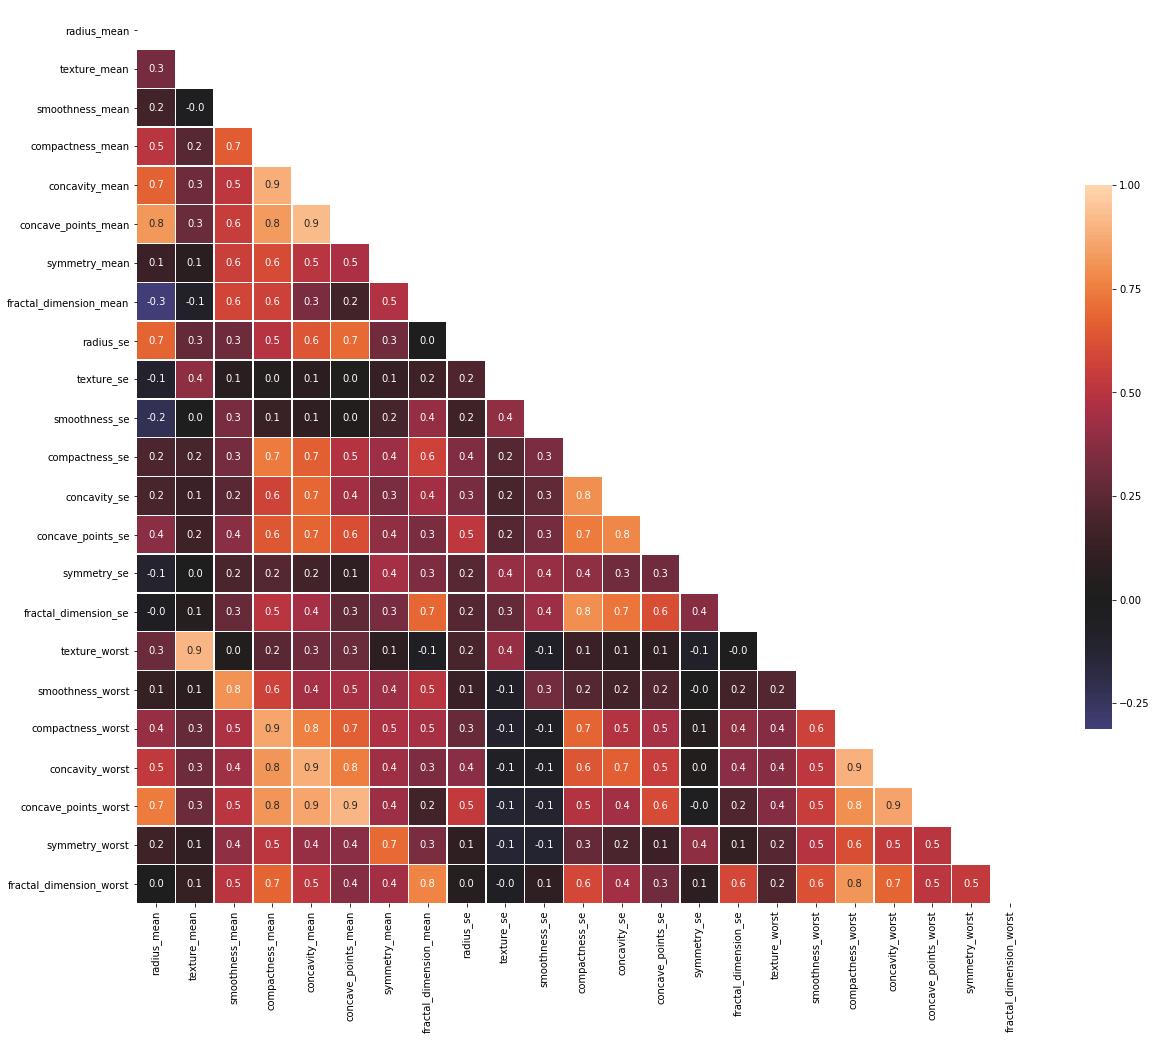

In [623]:
%config InlineBackend.figure_format = 'png' 
corr = df.corr()
plt.figure(figsize=(20,20))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [624]:
df.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,...,0.011796,0.020542,0.003795,25.677223,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,...,0.006170,0.008266,0.002646,6.146258,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,...,0.000000,0.007882,0.000895,12.020000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,...,0.007638,0.015160,0.002248,21.080000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,...,0.010930,0.018730,0.003187,25.410000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,...,0.014710,0.023480,0.004558,29.720000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,...,0.052790,0.078950,0.029840,49.540000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 5. Классификация, балансировка, разбиение на train/test

In [625]:
diagnosismp = df['diagnosis'].value_counts().to_dict()
diagnosismp['B'] = 0
diagnosismp['M'] = 1
diagnosismp

{'B': 0, 'M': 1}

In [626]:
df['diagnosis'] = df['diagnosis'].apply(diagnosismp.get)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [627]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [628]:
df['diagnosis'].value_counts() / df['diagnosis'].count() * 100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [629]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
y_train = df_train['diagnosis'].copy()
x_train = df_train.drop('diagnosis',axis=1)

y_test = df_test['diagnosis'].copy()
x_test = df_test.drop('diagnosis',axis=1)

#x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)


In [630]:
d = df_train['diagnosis'].value_counts() / df_train['diagnosis'].count() * 100
d

0    62.562814
1    37.437186
Name: diagnosis, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D181D48D0>]],
      dtype=object)

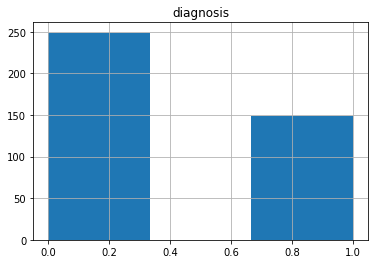

In [631]:
df_train.hist(column='diagnosis', bins=3)

In [632]:
df_test['diagnosis'].value_counts() / df_test['diagnosis'].count() * 100

0    63.157895
1    36.842105
Name: diagnosis, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D176DAA20>]],
      dtype=object)

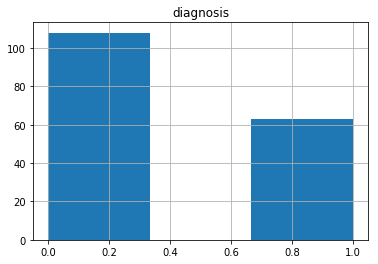

In [633]:
df_test.hist(column='diagnosis', bins=3)

In [634]:
lin_reg = LinearRegression().fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.26975821784810267

In [635]:
#undersampling
df_us = pd.concat([df[df['diagnosis'] == 0].sample(215), df[df['diagnosis'] == 1]])
df_us['diagnosis'].value_counts() / df_us['diagnosis'].count() * 100

0    50.351288
1    49.648712
Name: diagnosis, dtype: float64

In [636]:
df_train_us, df_test_us = train_test_split(df_us, test_size=0.3, random_state=42)
y_train_us = df_train_us['diagnosis'].copy()
x_train_us = df_train_us.drop('diagnosis',axis=1)

y_test_us = df_test_us['diagnosis'].copy()
x_test_us = df_test_us.drop('diagnosis',axis=1)


In [637]:
lin_reg = LinearRegression().fit(x_train_us, y_train_us)
y_pred_us = lin_reg.predict(x_test_us)
mse = mean_squared_error(y_test_us, y_pred_us)
rmse = np.sqrt(mse)
rmse

0.27440068032939063

In [638]:
#oversampling
df_os = pd.concat([df[df['diagnosis'] == 0], df[df['diagnosis'] == 1], df[df['diagnosis'] == 1].sample(140)])
df_os['diagnosis'].value_counts() / df_os['diagnosis'].count() * 100

0    50.352609
1    49.647391
Name: diagnosis, dtype: float64

In [639]:
df_train_os, df_test_os = train_test_split(df_os, test_size=0.3, random_state=42)
y_train_os = df_train_os['diagnosis'].copy()
x_train_os = df_train_os.drop('diagnosis',axis=1)

y_test_os = df_test_os['diagnosis'].copy()
x_test_os = df_test_os.drop('diagnosis',axis=1)


In [640]:
lin_reg = LinearRegression().fit(x_train_os, y_train_os)
y_pred_os = lin_reg.predict(x_test_os)
mse = mean_squared_error(y_test_os, y_pred_os)
rmse = np.sqrt(mse)
rmse

0.2627371955909614

In [641]:
# На исходных данных ошибка была: 0.26975821784810267
# после undersampling : 0.28684809725261456 - ошибка увеличилась
# после oversampling : 0.260123320025811 - ошибка уменьшилась

In [642]:
y_train = y_train_os
x_train = x_train_os
y_test = y_test_os
x_test = x_test_os

#### 6. PCA

In [646]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

In [647]:
pca = PCA(n_components=2)
pca.fit(x_train_scaled)
X_pca = pca.transform(x_train_scaled)

Text(0,0.5,'Вторая главная компонента')

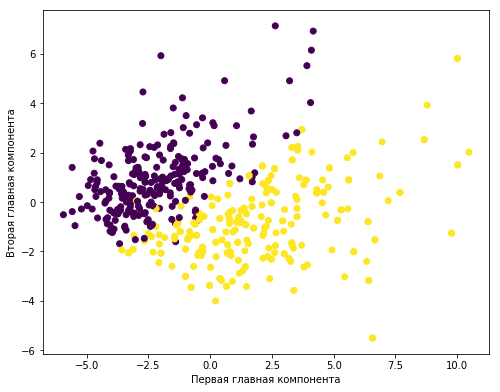

In [648]:
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_train)
plt.gca().set_aspect('equal')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

In [649]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.442
n-components=2, explained variance 0.581


In [650]:
pca.components_

array([[ 0.15338479,  0.0962149 ,  0.21516866,  0.29975591,  0.28867513,
         0.26387367,  0.20911774,  0.17832829,  0.17047284,  0.02800079,
         0.08091789,  0.24983076,  0.24409356,  0.21786943,  0.08718668,
         0.1925299 ,  0.10559563,  0.20327887,  0.27120939,  0.27510219,
         0.26632516,  0.1780991 ,  0.21837522],
       [-0.43215379, -0.24262871,  0.14612736,  0.00251335, -0.147906  ,
        -0.23111284,  0.14914196,  0.39353683, -0.22915469,  0.09456714,
         0.27290865,  0.13398705,  0.04547673, -0.03432872,  0.26937778,
         0.28096876, -0.22249599,  0.09879728, -0.01333488, -0.11700308,
        -0.22846099,  0.09778682,  0.19256298]])

In [651]:
pca = PCA(n_components=23)
pca.fit(x_train_scaled)
X_pca = pca.transform(x_train_scaled)

In [652]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.442
n-components=2, explained variance 0.581
n-components=3, explained variance 0.693
n-components=4, explained variance 0.776
n-components=5, explained variance 0.837
n-components=6, explained variance 0.888
n-components=7, explained variance 0.910
n-components=8, explained variance 0.925
n-components=9, explained variance 0.940
n-components=10, explained variance 0.952
n-components=11, explained variance 0.963
n-components=12, explained variance 0.972
n-components=13, explained variance 0.980
n-components=14, explained variance 0.986
n-components=15, explained variance 0.990
n-components=16, explained variance 0.992
n-components=17, explained variance 0.994
n-components=18, explained variance 0.996
n-components=19, explained variance 0.997
n-components=20, explained variance 0.998
n-components=21, explained variance 0.999
n-components=22, explained variance 1.000
n-components=23, explained variance 1.000


Text(0,0.5,'explained_variance_ratio_')

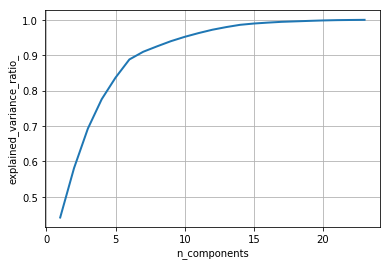

In [653]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

### 7. Попробуем уменьшить размерность выкинув наименее значимые атрибуты

In [654]:

lin_reg = LinearRegression().fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.2627371955909614

In [655]:
columns = [
    'radius_mean','texture_mean','smoothness_mean','compactness_mean',
    'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
    'radius_se','texture_se','smoothness_se','compactness_se','concavity_se',
    'concave points_se','symmetry_se','fractal_dimension_se',
    'texture_worst','smoothness_worst','compactness_worst','concavity_worst',
    'concave points_worst','symmetry_worst','fractal_dimension_worst'
]


In [656]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [657]:
def get_formula(_cols):
    return 'diagnosis ~ ' + " + ".join(_cols)

#### Итерация 0

In [658]:
_iteration_cols = x_train.columns

In [659]:
get_formula(_iteration_cols)

'diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + texture_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst'

In [660]:
lm = smf.ols(get_formula(_iteration_cols), df_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.24037136895497097
R^2: 0.7533131483333421


In [661]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.8536,0.426,-2.004,0.046,-1.691,-0.016
radius_mean,0.0202,0.013,1.604,0.110,-0.005,0.045
texture_mean,-0.0045,0.010,-0.438,0.662,-0.025,0.016
smoothness_mean,2.0015,2.449,0.817,0.414,-2.813,6.817
compactness_mean,-2.6512,1.323,-2.003,0.046,-5.253,-0.049
concavity_mean,-1.7425,1.293,-1.347,0.179,-4.285,0.800
concave_points_mean,8.8636,2.562,3.459,0.001,3.825,13.902
symmetry_mean,-0.9342,0.928,-1.007,0.315,-2.758,0.890
fractal_dimension_mean,-4.9809,6.528,-0.763,0.446,-17.816,7.854
radius_se,0.2311,0.075,3.088,0.002,0.084,0.378


#### Итерация 1

In [662]:
# выкинем texture_mean так как у него наибольшее p-value
_iteration_cols = _iteration_cols.drop('texture_mean')
lm = smf.ols(get_formula(_iteration_cols), df_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.24043299077480923
R^2: 0.7531866503955511


In [663]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.8549,0.425,-2.009,0.045,-1.691,-0.018
radius_mean,0.0198,0.013,1.576,0.116,-0.005,0.044
smoothness_mean,1.9017,2.435,0.781,0.435,-2.887,6.691
compactness_mean,-2.6682,1.321,-2.019,0.044,-5.266,-0.070
concavity_mean,-1.7606,1.291,-1.364,0.174,-4.299,0.778
concave_points_mean,8.8524,2.560,3.459,0.001,3.819,13.885
symmetry_mean,-1.0094,0.911,-1.108,0.268,-2.800,0.781
fractal_dimension_mean,-5.0274,6.520,-0.771,0.441,-17.847,7.792
radius_se,0.2295,0.075,3.074,0.002,0.083,0.376
texture_se,-0.0478,0.043,-1.109,0.268,-0.133,0.037


#### Итерация 2

In [664]:
# выкинем fractal_dimension_worst так как у него наибольшее p-value
_iteration_cols = _iteration_cols.drop('fractal_dimension_worst')
lm = smf.ols(get_formula(_iteration_cols), df_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.24055495021361226
R^2: 0.7529361951487992


In [665]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.8764,0.424,-2.068,0.039,-1.709,-0.043
radius_mean,0.0199,0.013,1.586,0.114,-0.005,0.045
smoothness_mean,1.7616,2.423,0.727,0.468,-3.002,6.526
compactness_mean,-2.8584,1.284,-2.226,0.027,-5.383,-0.334
concavity_mean,-1.7992,1.289,-1.396,0.163,-4.333,0.735
concave_points_mean,8.8965,2.556,3.480,0.001,3.870,13.923
symmetry_mean,-1.0347,0.909,-1.138,0.256,-2.822,0.753
fractal_dimension_mean,-2.7979,5.422,-0.516,0.606,-13.459,7.863
radius_se,0.2298,0.075,3.080,0.002,0.083,0.377
texture_se,-0.0481,0.043,-1.116,0.265,-0.133,0.037


#### Итерация 3

In [666]:
# выкинем fractal_dimension_mean так как у него наибольшее p-value
_iteration_cols = _iteration_cols.drop('fractal_dimension_mean')
lm = smf.ols(get_formula(_iteration_cols), df_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.2406401274400043
R^2: 0.7527612003265834


In [667]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.0529,0.250,-4.219,0.000,-1.544,-0.562
radius_mean,0.0235,0.010,2.242,0.026,0.003,0.044
smoothness_mean,1.6649,2.413,0.690,0.491,-3.080,6.410
compactness_mean,-3.1857,1.115,-2.857,0.005,-5.378,-0.993
concavity_mean,-1.8092,1.287,-1.406,0.161,-4.340,0.722
concave_points_mean,8.9045,2.554,3.487,0.001,3.883,13.926
symmetry_mean,-1.0000,0.906,-1.104,0.270,-2.781,0.781
radius_se,0.2270,0.074,3.054,0.002,0.081,0.373
texture_se,-0.0484,0.043,-1.123,0.262,-0.133,0.036
smoothness_se,19.4620,7.878,2.470,0.014,3.971,34.953


#### Итерация 4

In [668]:
# выкинем smoothness_mean так как у него наибольшее p-value
_iteration_cols = _iteration_cols.drop('smoothness_mean')
lm = smf.ols(get_formula(_iteration_cols), df_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.24079198368597568
R^2: 0.752449061177486


In [669]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.9868,0.230,-4.285,0.000,-1.440,-0.534
radius_mean,0.0224,0.010,2.165,0.031,0.002,0.043
compactness_mean,-2.9316,1.052,-2.787,0.006,-5.000,-0.863
concavity_mean,-1.9255,1.275,-1.510,0.132,-4.433,0.582
concave_points_mean,9.3323,2.476,3.769,0.000,4.464,14.200
symmetry_mean,-0.9079,0.895,-1.014,0.311,-2.668,0.852
radius_se,0.2284,0.074,3.076,0.002,0.082,0.374
texture_se,-0.0445,0.043,-1.043,0.298,-0.128,0.039
smoothness_se,17.9817,7.575,2.374,0.018,3.087,32.877
compactness_se,-4.8347,2.499,-1.935,0.054,-9.749,0.079


#### Итерация 5

In [670]:
# выкинем smoothness_worst так как у него наибольшее p-value
_iteration_cols = _iteration_cols.drop('smoothness_worst')
lm = smf.ols(get_formula(_iteration_cols), df_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 0.2408459119616376
R^2: 0.7523381647098278


In [671]:
lm_res = lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.0449,0.182,-5.747,0.000,-1.402,-0.687
radius_mean,0.0242,0.009,2.575,0.010,0.006,0.043
compactness_mean,-3.0617,1.002,-3.055,0.002,-5.032,-1.091
concavity_mean,-1.7972,1.235,-1.455,0.146,-4.226,0.631
concave_points_mean,9.1334,2.426,3.766,0.000,4.364,13.903
symmetry_mean,-0.8748,0.891,-0.982,0.327,-2.626,0.876
radius_se,0.2238,0.073,3.052,0.002,0.080,0.368
texture_se,-0.0444,0.043,-1.042,0.298,-0.128,0.039
smoothness_se,15.8555,5.534,2.865,0.004,4.975,26.736
compactness_se,-4.4527,2.318,-1.921,0.055,-9.010,0.105


In [675]:
sub_x_train = x_train[_iteration_cols]
sub_x_test = x_test[_iteration_cols]

lin_reg = LinearRegression().fit(sub_x_train, y_train)
y_pred = lin_reg.predict(sub_x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.2653907581395537

In [673]:
lin_reg = LinearRegression().fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.2627371955909614

In [680]:
# Удаление менее значимых атрибутов приводит к увеличению ошибки в 3м знаке после запятой

### 9. Обучение и предсказание

In [681]:
clf = LogisticRegression()
clf.fit(X=x_train, y=y_train)
y_train_predict = clf.predict_proba(x_train)[:, 1]
y_test_predict = clf.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.99
Test:  0.99


In [682]:
Accuracy = sum([1 if a==b else 0 for a, b in zip(np.array(y_test), y_test_pred)])/len(y_test_pred)
print('Accuracy: ', Accuracy)

Accuracy:  0.9671361502347418


In [683]:
y_test_pred = clf.predict(x_test)
report = classification_report(y_test, y_test_pred, target_names=['benign', 'malicious'])
print(report)

             precision    recall  f1-score   support

     benign       0.97      0.89      0.93       121
  malicious       0.87      0.97      0.92        92

avg / total       0.93      0.92      0.93       213



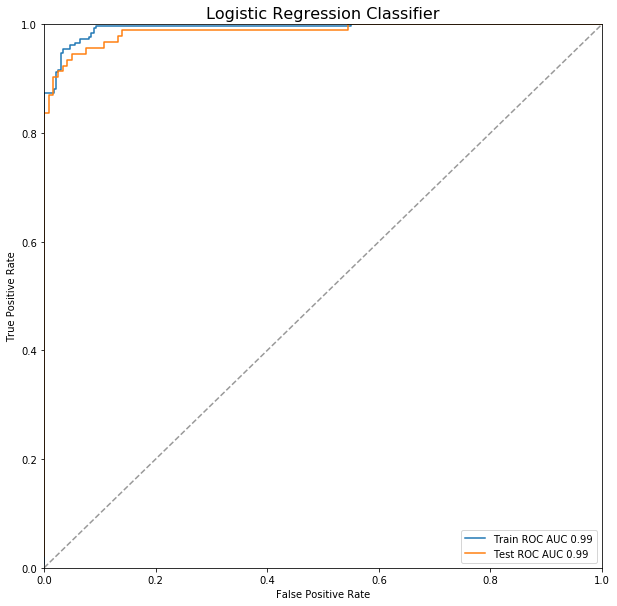

In [684]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [685]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  1.0


In [686]:
Accuracy = sum([1 if a==b else 0 for a, b in zip(np.array(y_test), y_test_pred)])/len(y_test_pred)
print('Accuracy: ', Accuracy)

Accuracy:  0.9248826291079812


In [687]:
y_test_pred = xgb.predict(x_test)
report = classification_report(y_test, y_test_pred, target_names=['benign', 'malicious'])
print(report)

             precision    recall  f1-score   support

     benign       1.00      0.92      0.96       121
  malicious       0.90      1.00      0.95        92

avg / total       0.96      0.95      0.95       213



C:\Users\gpsdo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


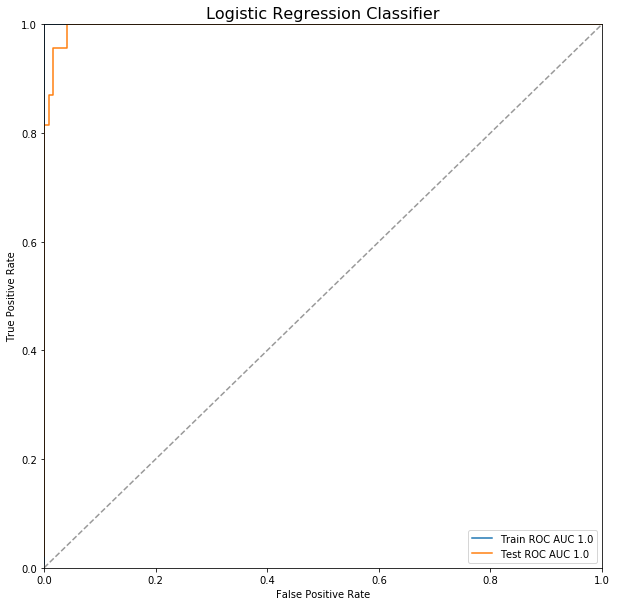

In [688]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

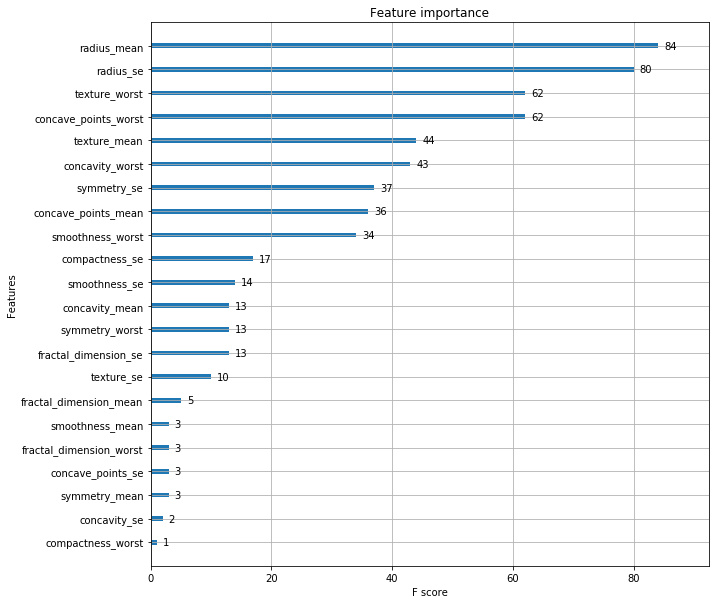

In [689]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 10)
xgboost.plot_importance(booster=xgb)
plt.savefig('tree_importance_test1.png')